# Regression with Automatic Differentiation in TensorFlow

# Task 1: TensorFlow

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print('Using TensorFlow version:', tf.__version__)
print('Devices available:', tf.config.list_physical_devices())

Using TensorFlow version: 2.1.0
Devices available: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


# Task 2: Constants

In [3]:
#tensorflow is a linear algebra library which can perform all sorts of operations on tensors
#tensor is a term for n dimensional arrays where n can be 1 or millions
tf.constant([[1,2,3]])#create tensor
#values returned are immutable

<tf.Tensor: shape=(1, 3), dtype=int32, numpy=array([[1, 2, 3]])>

In [4]:
tf.convert_to_tensor([[1,2,3]])#same

<tf.Tensor: shape=(1, 3), dtype=int32, numpy=array([[1, 2, 3]])>

In [5]:
tf.convert_to_tensor([[1,2,3]], dtype=tf.float32)

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[1., 2., 3.]], dtype=float32)>

In [6]:
tf.convert_to_tensor([[1,2,3]]).numpy()#returns numpy value

array([[1, 2, 3]])

# Task 3: Variables

In [7]:
tf.Variable([[1,2,3]])#variable -changeable

<tf.Variable 'Variable:0' shape=(1, 3) dtype=int32, numpy=array([[1, 2, 3]])>

In [8]:
v= tf.Variable(1)
print('Initial value: ',v.numpy())
v.assign(2)
print('New value: ',v.numpy())

Initial value:  1
New value:  2


In [9]:
c= tf.convert_to_tensor(np.random.randn(2,3))
v= tf.Variable(np.random.randn(3,1))
print(tf.matmul(c, v))

tf.Tensor(
[[-1.92089353]
 [-0.94997828]], shape=(2, 1), dtype=float64)


# Task 4: Automatic Differentiation

Let's take a simple equation as an example:
\begin{equation}
y = x^3 ; \frac{dy}{dx} = 3x^2
\end{equation}

In [10]:
x= tf.Variable(2.0)

with tf.GradientTape() as tape:
    y=x**3

dy_dx= tape.gradient(y, x)# dy/dx
print('Gradient at x={} is {}'.format(x.numpy(), dy_dx.numpy()))

Gradient at x=2.0 is 12.0


What about higher order gradients?

\begin{equation}
y = x^3 ; \frac{dy}{dx} = 3x^2 ; \frac{d^2 y}{dx^2} = 6x
\end{equation}

In [11]:
x= tf.Variable(5.0)

with tf.GradientTape() as t1:
    with tf.GradientTape() as t2:
        y=x**3
    dy_dx= t2.gradient(y,x)
d2y_dx2= t1.gradient(dy_dx, x)

print('2nd order gradient at x={} is {}'.format(x.numpy(), d2y_dx2.numpy()))

2nd order gradient at x=5.0 is 30.0


# Task 5: Watching Tensors

In [12]:
x= tf.constant(3.0)

with tf.GradientTape() as tape:
    y=x**3

dy_dx= tape.gradient(y, x)# dy/dx
print(dy_dx)

None


In [13]:
x= tf.constant(3.0)

with tf.GradientTape() as tape:
    tape.watch(x)
    y=x**3

dy_dx= tape.gradient(y, x)# dy/dx
print(dy_dx)

tf.Tensor(27.0, shape=(), dtype=float32)


# Task 6: Persistent Tape

\begin{equation}
y = x^3 ; z = 2y ; \frac{dz}{dx} = \frac{dz}{dy} . \frac{dy}{dx}
\end{equation}

In [14]:
x= tf.Variable(3.0)

with tf.GradientTape(persistent=True) as tape:
    y= x**3
    z= 2*y
    
dz_dy= tape.gradient(z,y)
dy_dx= tape.gradient(y,x)
dz_dx= tape.gradient(z,x)

del tape

print('dz_dy', dz_dy.numpy())
print('dy_dx', dy_dx.numpy())
print('dz_dx', dz_dx.numpy())

dz_dy 2.0
dy_dx 27.0
dz_dx 54.0


# Task 7: Generating Data for Linear Regression

Solve a simple linear equation:

\begin{equation}
y = wx + b
\end{equation}

In [15]:
true_w, true_b= 7., 4.

def create_batch(batch_size= 64):
    x= np.random.randn(batch_size, 1) 
    y= np.random.randn(batch_size, 1) + true_w * x + true_b
    #adding random numbers in y to have errors in example
    return x,y

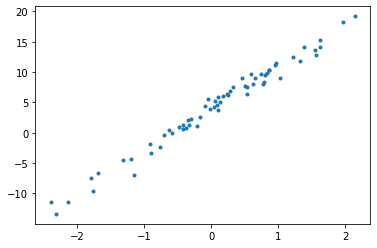

In [16]:
x,y= create_batch()
plt.plot(x,y, '.')#each ex will be a dot

# Task 8: Linear Regression

In [20]:
iterations= 100
lr= 0.03#learning rate

w_history= []
b_history=[]

w= tf.Variable(10.0)
b=tf.Variable(1.0)

for i in range(0, iterations):
    x_batch, y_batch= create_batch()
    x_batch= tf.convert_to_tensor(x_batch, dtype=tf.float32)
    y_batch= tf.convert_to_tensor(y_batch, dtype=tf.float32)
    with tf.GradientTape(persistent=True) as tape:
        y=b+w*x_batch  
        loss= tf.reduce_mean(tf.square(y-y_batch))
    dw = tape.gradient(loss, w)
    db= tape.gradient(loss, b)
    
    del tape
    
    w.assign_sub(lr*dw)#w-lr*dw assigned to w
    b.assign_sub(lr*db)
    
    w_history.append(w.numpy())
    b_history.append(b.numpy())
    
    if i%10 == 0:
        print('Iter {}, w={}, b={}'.format(i, w.numpy(), b.numpy()))

Iter 0, w=9.858232498168945, b=1.1661958694458008
Iter 10, w=8.52772331237793, b=2.4811737537384033
Iter 20, w=7.8622236251831055, b=3.174487352371216
Iter 30, w=7.455540657043457, b=3.5688815116882324
Iter 40, w=7.251367568969727, b=3.7663612365722656
Iter 50, w=7.1036057472229, b=3.860471248626709
Iter 60, w=7.060928821563721, b=3.9422178268432617
Iter 70, w=7.038753032684326, b=4.005410671234131
Iter 80, w=6.985630035400391, b=4.020907402038574
Iter 90, w=7.016393661499023, b=3.9957494735717773


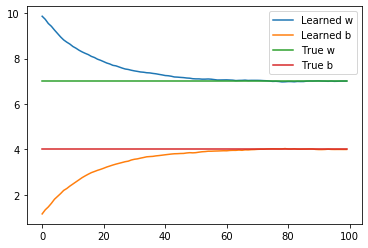

In [22]:
plt.plot(range(iterations), w_history, label='Learned w')
plt.plot(range(iterations), b_history, label='Learned b')
plt.plot(range(iterations), [true_w] * iterations, label='True w')
plt.plot(range(iterations), [true_b] * iterations, label='True b')
plt.legend()
plt.show()